In [1]:
import numpy as np
import numpy.fft as fft
from scipy import signal as sg
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.append("/home/jovyan/")

from imtools import load_img, show_img
from sigtools import *

img = load_img('oriental_pearl.jpg')

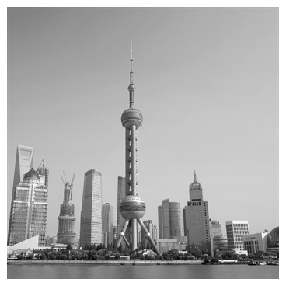

In [2]:
show_img(img)

In [21]:
def bandpass_kernel(cutoff_low=20, cutoff_high=-10, transition_band=10, sample_frequency = 1000):
  
    bandpass_1d = bandpass(cutoff_low, cutoff_high, transition_band, sample_frequency)
    bandpass_2d = np.outer(bandpass_1d, bandpass_1d)

    return bandpass_2d

Filter Length = 41


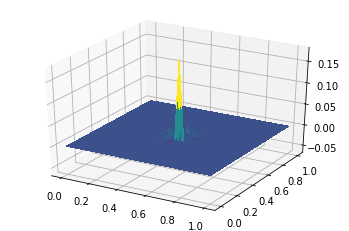

In [26]:
kernel = bandpass_kernel(cutoff_low=120, cutoff_high=2, transition_band=50, sample_frequency = 500)
_, size = kernel.shape
X, Y = np.meshgrid(np.linspace(0,1,size), np.linspace(0,1,size))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, kernel, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, aa=False)

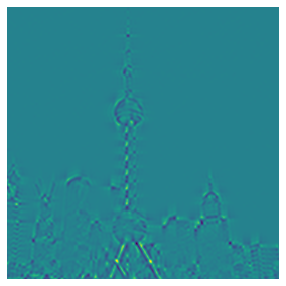

In [33]:
filtered_img = sg.convolve(kernel, img, 'valid')

show_img(filtered_img, color=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


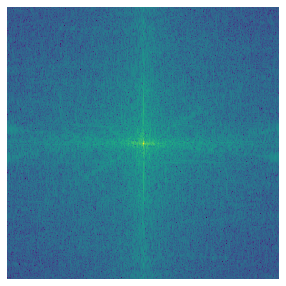

In [28]:
fourier_raw = fft.fft2(img)
fourier_img = fft.fftshift(fourier_raw)
show_img((20*np.log10(0.1 + fourier_img)).astype(int), color=True) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


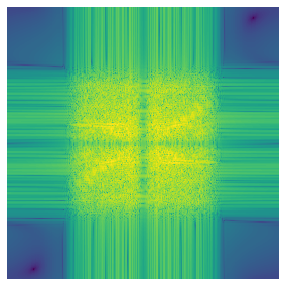

In [29]:
fourier_raw = fft.fft2(filtered_img)
fourier_img = fft.fftshift(fourier_raw)
show_img((20*np.log10(0.1 + fourier_img)).astype(int), color=True) 
